## Obtaining Feature Importances

The following example was taken from the [scikit-learn feature importance page](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)

More has been added to it so as to ensure that we meet our strict iRF guidelines

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Set seed for reproducibility
np.random.seed(200)

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)



# Check the shape of the data
print(X[:10])
print(X.shape)

print(y[:100])
print(y.shape)

[[ 0.24983722  2.07999753 -2.41574285  1.55250219 -0.02025345  1.52308665
   1.50875967 -0.44983528 -0.04794935 -0.36425081]
 [-0.48628731  2.43254818 -2.81984222 -0.16765617  1.1524328  -0.20515407
   1.67435428  0.92336623 -0.5970967  -0.78257457]
 [ 0.13037419  1.37164964 -1.48661612  0.28419927 -0.27937185  0.48323822
  -1.70331195 -1.31814927 -1.18427125  0.9759933 ]
 [ 0.03665774  0.96342311 -1.6891696  -1.65494387  1.08040923 -0.73978191
  -0.2680128  -0.62612224  1.00035313  1.6443156 ]
 [ 1.56402374  1.10505348 -0.72742672 -0.16041893 -1.0084325   0.99674704
  -1.44200591  0.37850032 -0.8213494  -1.74987461]
 [ 1.5857341   0.16702301 -0.13383424 -0.28114492 -0.74741052  0.59259239
  -0.02407507  1.13935135 -1.01846879  0.04419178]
 [ 0.06197247  1.80809251 -1.55423753 -0.3123385  -0.73702997  1.90030652
   0.15354636  1.28187305 -0.00282095 -0.30701463]
 [-0.15204948  1.90934407 -2.7491062  -0.07976561 -0.81365327 -0.14478753
  -0.40902935  0.55462549 -1.08926689 -1.96281359]


### Output the feature importances and standard deviations

In [22]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Check that the feature importances are standardized to 1
print(sum(importances))

1.0


### Display the feature importances visually

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


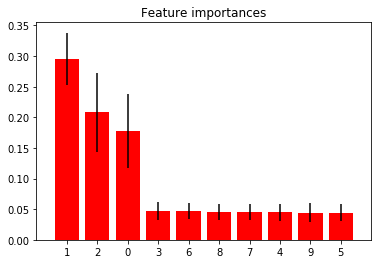

In [18]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Iris Example

* This is partly taken from Chris Albon's website, but adapted to not use pandas as scikit-learn only allows for the numpy dependency for data processing
* Note that the iris dataset is a 3-class not binary class. Just keep in mind that we would only use **binary** class in iRF

In [36]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's train-test split function
from sklearn.cross_validation import train_test_split

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Load numpy
import numpy as np

# Set the random seed for reproducibility
np.random.seed(1015)

### Load the iris Dataset and examine

In [37]:
# Create an object called iris with the iris data
iris = load_iris()
print(iris.keys())

# Observe the 3 classes in the iris dataset
print(iris.target)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Split into train-test

In [38]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

### Check the split - shape of train/ test data

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


### Examine the training data

In [46]:
print(X_train[:10])
print(y_train[:10])

[[ 5.7  4.4  1.5  0.4]
 [ 5.8  2.7  4.1  1. ]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.2  1.2  0.2]
 [ 5.2  2.7  3.9  1.4]
 [ 7.1  3.   5.9  2.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.1  3.5  1.4  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.9  2.4  3.3  1. ]]
[0 1 0 0 1 2 0 0 0 1]


### Fit the Random Forest Classifier

* Note that we are not going to fit the `ExtraTreesClassifier` at this stage - but we will come back to it

In [47]:
from sklearn.ensemble import RandomForestClassifier

Just Fit using 2 trees for now - keep things simple

In [56]:
rf = RandomForestClassifier(n_estimators = 2)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [57]:
rf.predict(X_test)
rf.score(X_test, y_test)

0.94736842105263153

That's an accuracy of 94% just using 2 trees!

In [58]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Check that the feature importances are standardized to 1
print(sum(importances))

1.0


Feature ranking:
1. feature 3 (0.600299)
2. feature 2 (0.251815)
3. feature 0 (0.139037)
4. feature 1 (0.008849)


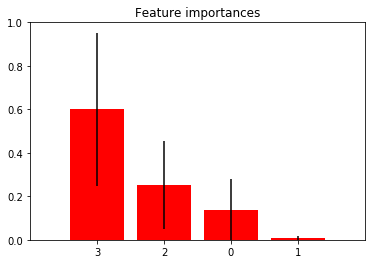

In [61]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [62]:
importances

array([ 0.13903735,  0.00884926,  0.25181463,  0.60029877])

In [63]:
indices

array([3, 2, 0, 1])